# Exploring Data with Pandas

In [1]:
from IPython.display import HTML

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read csv files in

df2019 = pd.read_csv("NBA_data/NBA_Season_avgs_2019.csv")
df2018 = pd.read_csv("NBA_data/NBA_Season_avgs_2018.csv")
df2017 = pd.read_csv("NBA_data/NBA_Season_avgs_2017.csv")
df2016 = pd.read_csv("NBA_data/NBA_Season_avgs_2016.csv")
df2015 = pd.read_csv("NBA_data/NBA_Season_avgs_2015.csv")
df2014 = pd.read_csv("NBA_data/NBA_Season_avgs_2014.csv")

In [3]:
# combine files and dropped offensive statistics
df = pd.concat([df2019, df2018, df2017, df2016, df2015, df2014], axis=0)
df["playoffs_y_n"] = df["Team"].map(lambda x: 1 if "*" in x else 0)

In [4]:
#determine dimensions

df.shape

(180, 29)

In [5]:
#print the last 3 rows
df.tail(3)

,RK,Team,Year,G,W,L,Conf,MP,FG,FGA,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,playoffs_y_n
27,28,Milwaukee Bucks,2014,82,15,67,East,242.4,36.0,82.2,...,0.747,11.8,29.3,21.5,6.6,4.9,15.1,20.9,95.5,0
28,29,Utah Jazz,2014,82,25,57,West,241.2,36.0,81.1,...,0.747,11.0,30.2,20.3,7.0,4.5,14.6,20.7,95.0,0
29,30,Chicago Bulls*,2014,82,48,34,East,243.0,34.7,80.2,...,0.779,11.4,32.7,22.7,7.2,5.2,14.9,19.1,93.7,1


In [6]:
pd.DataFrame(df.dtypes, columns=['Data Type'])

,Data Type
RK,int64
Team,object
Year,int64
G,int64
W,int64
L,int64
Conf,object
MP,float64
FG,float64
FGA,float64


# Identify and Remove all Missing Data

In [7]:
df.isnull().sum()

RK              0
Team            0
Year            0
G               0
W               0
L               0
Conf            0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
2P              0
2PA             0
2P%             0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
playoffs_y_n    0
dtype: int64

In [8]:
# We're in luck! No nulls!

# Data Visualization

In [10]:
plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [9]:
# let's sort by steals, descending
df2014.sort_values(by='STL', ascending=False).head(3)

,RK,Team,Year,G,W,L,Conf,MP,FG,FGA,...,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
18,19,Philadelphia 76ers,2014,82,19,63,East,242.1,37.9,87.2,...,23.4,0.710,11.6,31.2,21.8,9.3,4.0,16.9,22.5,99.5
11,12,Miami Heat*,2014,82,54,28,East,242.4,38.3,76.5,...,23.0,0.760,7.6,29.2,22.5,8.9,4.5,14.8,19.5,102.2
2,3,Minnesota Timberwolves,2014,82,40,42,West,242.1,38.9,87.5,...,28.1,0.778,12.5,32.2,23.9,8.8,3.6,13.9,18.3,106.9


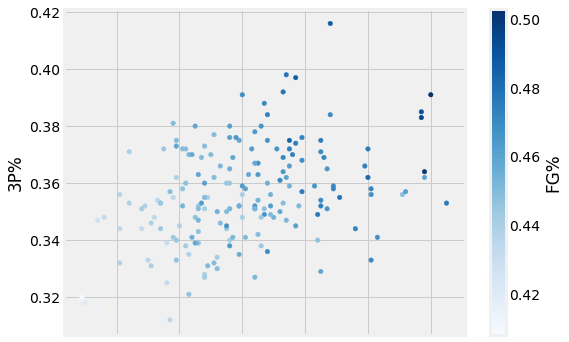

In [16]:
# Vary point color by FG% .
df.plot(kind='scatter', x='2P%', y='3P%', c='FG%', colormap='Blues');

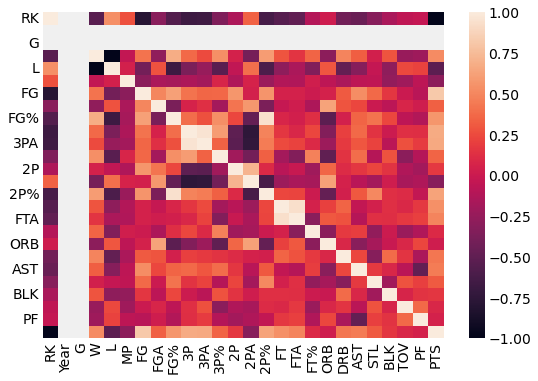

In [13]:
#Made a heatmap on the correlation between variables in the dataset
nba_correlations = df2014.corr();
sns.heatmap(nba_correlations);